# 深度学习入门：基于Python的理论与实现笔记

## How to creat custom class in python

In [1]:
class Man:
    def __init__(self,name,prefix):
        self.name = name
        self.prefix = prefix
        print('Initialized !!')
        
    def hello(self):
        print('Hello ' + self.prefix + '.' + self.name + '!')
        
    def goodbye(self):
        print('Goodbye ' + self.prefix + '.' + self.name + '!')


In [2]:
m = Man('QYQ','Genius')
m.hello()
m.goodbye()

Initialized !!
Hello Genius.QYQ!
Goodbye Genius.QYQ!


In [3]:
%matplotlib inline

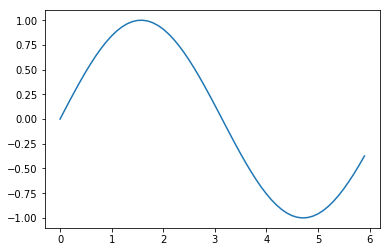

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# generate data
x = np.arange(0,6,0.1)
y = np.sin(x)

# plot
plt.plot(x,y)
plt.show()

# 感知机Perceptron

## 与门(AND-gate)

In [5]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(x*w)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
if __name__ == '__main__':
    for xs in [(0,0),(0,1),(1,0),(1,1)]:
        y = AND(xs[0],xs[1])
        print(str(xs) + '->' + str(y))

(0, 0)->0
(0, 1)->0
(1, 0)->0
(1, 1)->1


# 神经网络

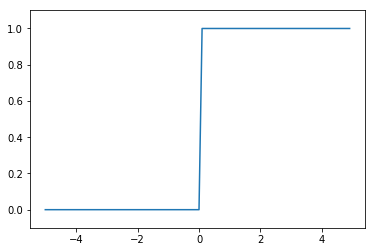

In [6]:
def step_function(x):
    return np.array(x>0,dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

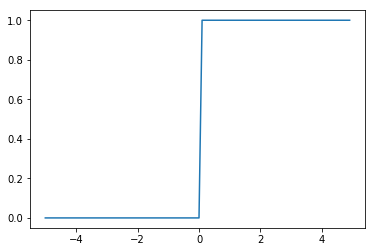

In [7]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

x1 = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x)
plt.plot(x,y)
plt.show()

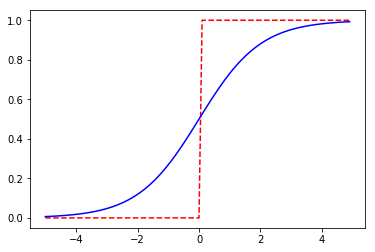

In [8]:
plt.plot(x,y,'r--',x1,y1,'b-')
plt.show()

# 实现神经网络

## 矩阵点乘

In [9]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
print('W is:\n',W)
Y = np.dot(X,W)
print('Y is:\n',Y)

W is:
 [[1 3 5]
 [2 4 6]]
Y is:
 [ 5 11 17]


## Summary

In [10]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # first layer weight
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[[0.1,0.4],[0.2,0.5],[0.3,0.6]]]) # second layer weight
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])
    return network

def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = a3
    return y
    
network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[[0.31682708 0.69627909]]


## Softmax 函数

In [19]:
def softmax(x):
    c = np.max(x)   
    exp_x = np.exp(x-c) #溢出对策
    sum_exp_x = np.sum(exp_x)
    y = exp_x/sum_exp_x
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [20]:
np.sum(y)

1.0